In [160]:
#imports 
# imports
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

# load hourly data
hourly_data = pd.read_csv("G:\\Projects\\Sharing_bike_analysis\\biking_analysis\\dataset\\hour.csv")


# Data Processing

In [161]:
hourly_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Checking the size of the data, the number of missing values for each column, and some general statistics about the numeral columns

In [162]:
#Printing generic statistics about the data

print(f"shape of the date: {hourly_data.shape}")
print(f"Number of missing values in the data: {hourly_data.isnull().sum().sum()}" )

shape of the date: (17379, 17)
Number of missing values in the data: 0


Note that the 'T' character after the 'describe()' method gets the transpose of the resulting dataset, hence the columns become rows and vice versa.

In [163]:
#get statistics on the numerical columns

hourly_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [164]:
# Creating a copy of the orginal data
preprocessed_data = hourly_data.copy()
preprocessed_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [165]:
# transform seasons 
#season_mappings = {"winter": 1, "spring": 2,"summer": 3, "autumn": 4}
season_mappings = {1: "winter", 2: "spring", 3: "summer", 4: "autumn"}
preprocessed_data['season'] = preprocessed_data['season'].apply(lambda x: season_mappings[x])
preprocessed_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,winter,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,winter,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,winter,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,winter,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,winter,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,winter,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,winter,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,winter,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [166]:
# transform yr
yr_mapping = {0: 2011, 1: 2012}
preprocessed_data['yr'] = preprocessed_data['yr'].apply(lambda x: yr_mapping[x])


In [167]:
preprocessed_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,winter,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,winter,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,winter,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,winter,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,winter,2012,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,winter,2012,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,winter,2012,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,winter,2012,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [168]:
# Transform Week-day
weekday_mapping = {0 : 'sunday', 1 : 'monday', 2 : 'tuesday', 3 : 'wednesday', 4 : 'thursday', 5 : 'friday', 6 : 'saturday'}      #7 : 'sunday'}

#preprocessed_data.loc[preprocessed_data['weekday']==7]  # checking if there's a 7(sunday) - there isnt. 
# checkamountofdays = preprocessed_data.groupby('weekday')['workingday'].sum()
# checkamountofdays

preprocessed_data['weekday'] = preprocessed_data['weekday'].apply(lambda x: weekday_mapping[x])
preprocessed_data


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,0,saturday,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,winter,2011,1,1,0,saturday,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,winter,2011,1,2,0,saturday,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,winter,2011,1,3,0,saturday,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,winter,2011,1,4,0,saturday,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,winter,2012,12,19,0,monday,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,winter,2012,12,20,0,monday,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,winter,2012,12,21,0,monday,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,winter,2012,12,22,0,monday,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [169]:
# transform weathersit
weather_mapping = {1: 'clear', 2: 'cloudy', \
                   3: 'light_rain_snow', 4: 'heavy_rain_snow'}
preprocessed_data['weathersit'] = preprocessed_data['weathersit']\
                                  .apply(lambda x: \
                                  weather_mapping[x])
preprocessed_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,0,saturday,0,clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,winter,2011,1,1,0,saturday,0,clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,winter,2011,1,2,0,saturday,0,clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,winter,2011,1,3,0,saturday,0,clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,winter,2011,1,4,0,saturday,0,clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,winter,2012,12,19,0,monday,1,cloudy,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,winter,2012,12,20,0,monday,1,cloudy,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,winter,2012,12,21,0,monday,1,clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,winter,2012,12,22,0,monday,1,clear,0.26,0.2727,0.56,0.1343,13,48,61


In [170]:
# transform hum and windspeed
preprocessed_data['hum'] = preprocessed_data['hum']*100
preprocessed_data['windspeed'] = preprocessed_data['windspeed']\
                                 *150  #150 is a conversion to mph

preprocessed_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,0,saturday,0,clear,0.24,0.2879,81.0,0.000,3,13,16
1,2,2011-01-01,winter,2011,1,1,0,saturday,0,clear,0.22,0.2727,80.0,0.000,8,32,40
2,3,2011-01-01,winter,2011,1,2,0,saturday,0,clear,0.22,0.2727,80.0,0.000,5,27,32
3,4,2011-01-01,winter,2011,1,3,0,saturday,0,clear,0.24,0.2879,75.0,0.000,3,10,13
4,5,2011-01-01,winter,2011,1,4,0,saturday,0,clear,0.24,0.2879,75.0,0.000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,winter,2012,12,19,0,monday,1,cloudy,0.26,0.2576,60.0,24.630,11,108,119
17375,17376,2012-12-31,winter,2012,12,20,0,monday,1,cloudy,0.26,0.2576,60.0,24.630,8,81,89
17376,17377,2012-12-31,winter,2012,12,21,0,monday,1,clear,0.26,0.2576,60.0,24.630,7,83,90
17377,17378,2012-12-31,winter,2012,12,22,0,monday,1,clear,0.26,0.2727,56.0,20.145,13,48,61


In [171]:
# visualise preprocessed columns

cols = ['season', 'yr', 'weekday', 'weathersit', 'hum', 'windspeed']
preprocessed_data[cols].sample(10,random_state=123)


,season,yr,weekday,weathersit,hum,windspeed
5792,summer,2011,saturday,clear,74.0,20.145
7823,autumn,2011,sunday,clear,43.0,69.405
15426,autumn,2012,tuesday,cloudy,77.0,13.440
15028,autumn,2012,sunday,clear,51.0,49.260
12290,spring,2012,friday,cloudy,89.0,29.100
3262,spring,2011,friday,clear,64.0,15.675
10763,spring,2012,thursday,clear,42.0,53.730
12384,spring,2012,tuesday,light_rain_snow,82.0,24.630
6051,summer,2011,wednesday,clear,52.0,42.540
948,winter,2011,saturday,clear,80.0,0.000


Note that -  I did not transform the temp and atemp columns (that is, the true and perceived temperatures, respectively). The reason for this is that they assume only positive values in the original dataset (hence, I do not know when the negative temperatures occurred). Furthermore, as their scales are different (the maximum value registered in the true temperature is 41 degrees, while the perceived one is 67), I do not want to modify their relations (that is, the hours at which the true temperature is greater than the perceived one and vice versa).

### Registered VS Casual Use Analysis 
We begin the analysis of the single features by focusing on the two main ones: the number of rides performed by registered users versus the number of rides performed by non-registered (or casual) ones. These numbers are represented in the registered and casual columns, respectively, with the cnt column representing the sum of the registered and casual rides. We can easily verify the last statement for each entry in the dataset by using the assert statement:

In [172]:
"""
assert that total number of rides is equal to the sum of registered and casual ones
A check to see if casual + registered equals to the total amount of users. If false, then the following message appears -- 'Sum of casual and registered rides not equal ' 'to total number of rides'

"""
assert(preprocessed_data['casual'] + preprocessed_data['registered'] == preprocessed_data['cnt']).all(), 'Sum of casual and registered rides not equal ' 'to total number of rides'


 Visualizing the distribution of the registered and casual rides:

Text(0.5, 1.0, 'Rides distributions')

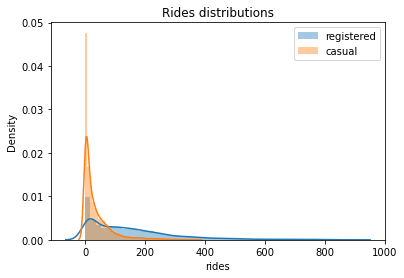

In [173]:
# plot distributions of registered vs casual rides
sns.distplot(preprocessed_data['registered'], label='registered')
sns.distplot(preprocessed_data['casual'], label='casual')
plt.legend()
plt.xlabel('rides')
plt.title("Rides distributions")
#plt.savefig('G:\\Projects\\Sharing_bike_analysis\\biking_analysis', format='png')

we can easily see that registered users perform way more rides than casual ones. Furthermore, we can see that the two distributions are skewed to the right, meaning that, for most of the entries in the data, zero or a small number of rides were registered (think, for example, of overnight rides). Finally, every entry in the data has quite a large number of rides (that is, higher than 800). 

Focusing on the evolution of rides overtime. We can analyse the number of rides each day by doing the following:

In [174]:
preprocessed_data.columns


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [175]:
"""
# preprocessed_data['dteday'] = preprocessed_data['dteday'].dt.strftime('%d-%m-%Y')  
"""
# Changing format of date
#preprocessed_data['dteday'] = preprocessed_data['dteday'].dt.strftime('%d-%m-%Y')
preprocessed_data['dteday'] = pd.to_datetime(preprocessed_data['dteday'], format='%d-%m-%Y')
preprocessed_data

ValueError: time data '2011-01-01' does not match format '%d-%m-%Y' (match)

In [ ]:
# test = plot_data.groupby('dteday').sum()
# test

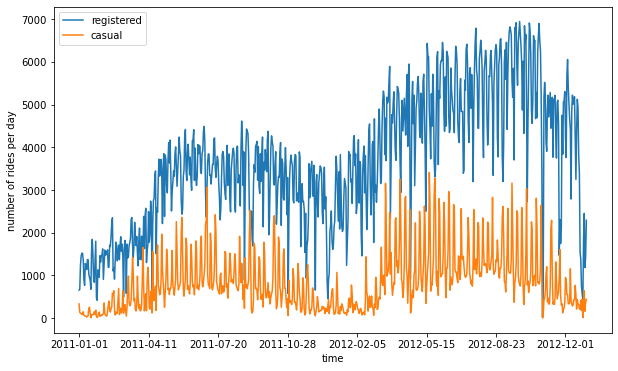

In [ ]:
plot_data = preprocessed_data[['registered','casual', 'dteday']]
ax = plot_data.groupby('dteday').sum().plot(figsize=(10,6))
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");

As you can see from the preceding figure, the number of registered rides is always above and significantly higher than the number of casual rides per day. Furthermore, we can observe that during winter, the overall number of rides decreases (which is totally in line with our expectations, as bad weather and low temperatures have a negative impact on ride sharing services). Note that there is quite a lot of variance in the time series of the rides in Figure 1.4. One way to smooth out the curves is to take the rolling mean and standard deviation of the two time series and plot those instead. In this way, we can visualize not only the average number of rides for a specific time period (also known as a window) but also the expected deviation from the mean: 

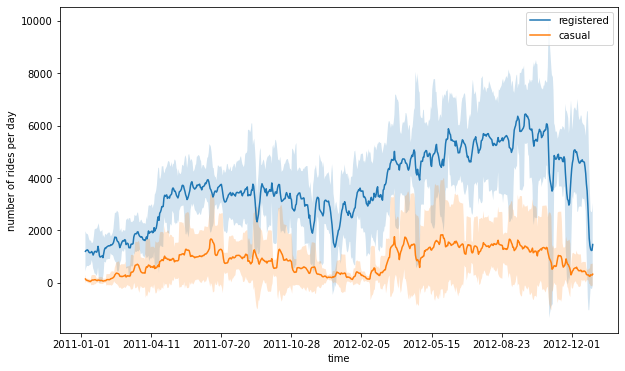

In [ ]:
"""
Create new dataframe with necessary for plotting columns, and obtain number of rides per day, by grouping over each day
"""
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
plot_data = plot_data.groupby('dteday').sum()
"""
define window for computing the rolling mean and standard deviation
"""
window = 7
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()
"""
Create a plot of the series, where we first plot the series of rolling means, then we color the zone between the series of rolling means +- 2 rolling standard deviations
"""
ax = rolling_means.plot(figsize=(10,6))
# ax.fill_between(rolling_means.index, rolling_means['registered'] + rolling_deviations['registered'], 
#                 rolling_means['registered'] - rolling_deviations['registered'], alpha = 0.2)

# ax.fill_between(rolling_means.index, rolling_means['casual'] + rolling_deviations['casual'], 
#                 rolling_means['casual'] - rolling_deviations['casual'], alpha = 0.2)

ax.fill_between(rolling_means.index, rolling_means['registered'] + 2*rolling_deviations['registered'], 
                rolling_means['registered'] - 2*rolling_deviations['registered'], alpha = 0.2)

ax.fill_between(rolling_means.index, rolling_means['casual'] + 2*rolling_deviations['casual'], 
                rolling_means['casual'] - 2*rolling_deviations['casual'], alpha = 0.2)

ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");
#plt.savefig('figs/rides_aggregated.png', format='png')

In order to compute the rolling statistics (that is, the mean and standard deviation), we use the rolling() function, in which we use mean() and std() to compute the rolling mean and standard deviation, respectively. This is a handy way to compute rolling statistics on time series, in which only recent entries account for computing them. In other words, the value of the rolling mean (or the standard deviation) at a certain time instance is only computed from the last window entries in the time series (in our case, this is 7), and not from the entries of the whole series.

Let's now focus on the distributions of the requests over separate hours and days of the week. We would expect certain time patterns to arise, as bike requests should be more frequent during certain hours of the day, depending on the day of the week. This analysis can be easily done by leveraging various functions from the seaborn package as shown below:

In [ ]:
preprocessed_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

G:\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


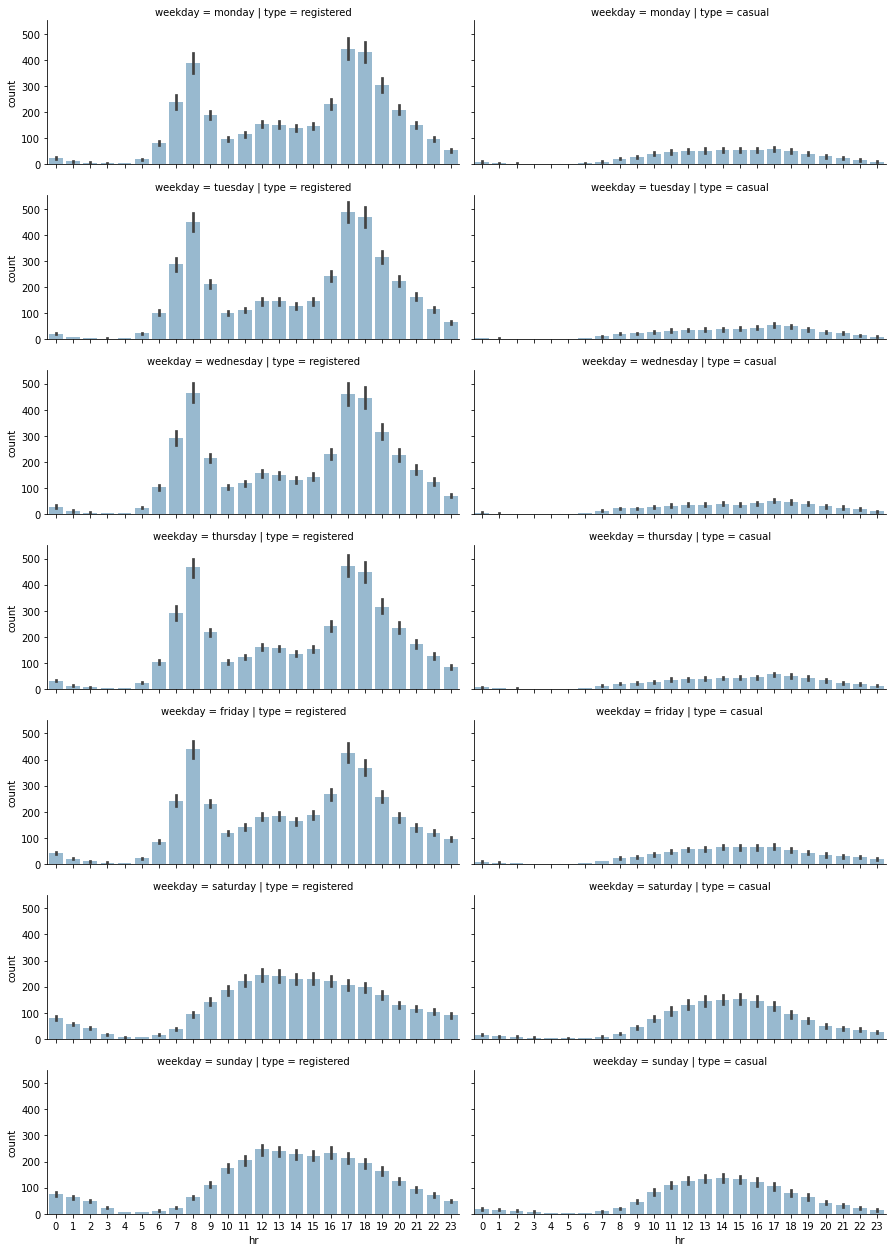

In [ ]:
# select relevant columns
plot_data = preprocessed_data[['hr', 'weekday', 'registered', 'casual']]
"""
transform the data into a format, in number of entries are computed as count, 
for each distinct hr, weekday and type (registered or casual)
"""
plot_data = plot_data.melt(id_vars=['hr', 'weekday'], var_name='type', value_name='count')
"""
create FacetGrid object, in which a grid plot is produced.
As columns, we have the various days of the week,
as rows, the different types (registered and casual)
"""
grid = sns.FacetGrid(plot_data, row='weekday', col='type', height=2.5, aspect=2.5, row_order=['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'])
# populate the FacetGrid with the specific plots
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)
#grid.savefig('figs/weekday_hour_distributions.png', format='png')

Focusing on the melt() function, applied on a pandas dataset. It will create a new dataset, in which values are grouped by the hr and weekday columns, while creating two new columns: type (containing the casual and registered values) and count (containing the respective counts for the casual and registered types).

The seaborn.FacetGrid() function will create a new grid of plots, with rows corresponding to the different days of the week and columns corresponding to the types. Finally, the map() function is applied to each element of the grid, creating the respective plots. The produced plot is shown in Figure 1.6. We can immediately note that on working days, the highest number of rides for registered users takes place around 8 AM and at 6 PM. This is totally in line with our expectations, as it is likely that most registered users use the bike sharing service for commuting. On the other hand, the casual usage of bike sharing services on working days is quite limited, as the plot shows.

During the weekend, we can see that ride distributions change for both casual and registered users. Still, registered rides are more frequent than casual ones, but both the distributions have the same shape, almost uniformly distributed between the time interval of 11 AM to 6 PM.

As a conclusion, we could claim that most of the usage of bike sharing services occurs during working days, right before and right after the standard working time (that is, 9 to 5):

# Analysing Seasonal Impact on Rides

Investigating the impact of different seasons on the total number of rides. 
### Goals:
- Create Grid plots 
- Distribute number of rides over hours and weekdays based on season. 


## Analysing distribution on a seasonal level.

In [184]:
# select subset of the data 

plot_data = preprocessed_data[['hr', 'season', 'registered', 'casual' ]]

In [185]:
# unpivot data from wide to long format

plot_data = plot_data.melt(id_vars=['hr', 'season'], var_name='type', value_name= 'count')

In [186]:
plot_data

,hr,season,type,count
0,0,winter,registered,13
1,1,winter,registered,32
2,2,winter,registered,27
3,3,winter,registered,10
4,4,winter,registered,1
...,...,...,...,...
34753,19,winter,casual,11
34754,20,winter,casual,8
34755,21,winter,casual,7
34756,22,winter,casual,13


G:\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


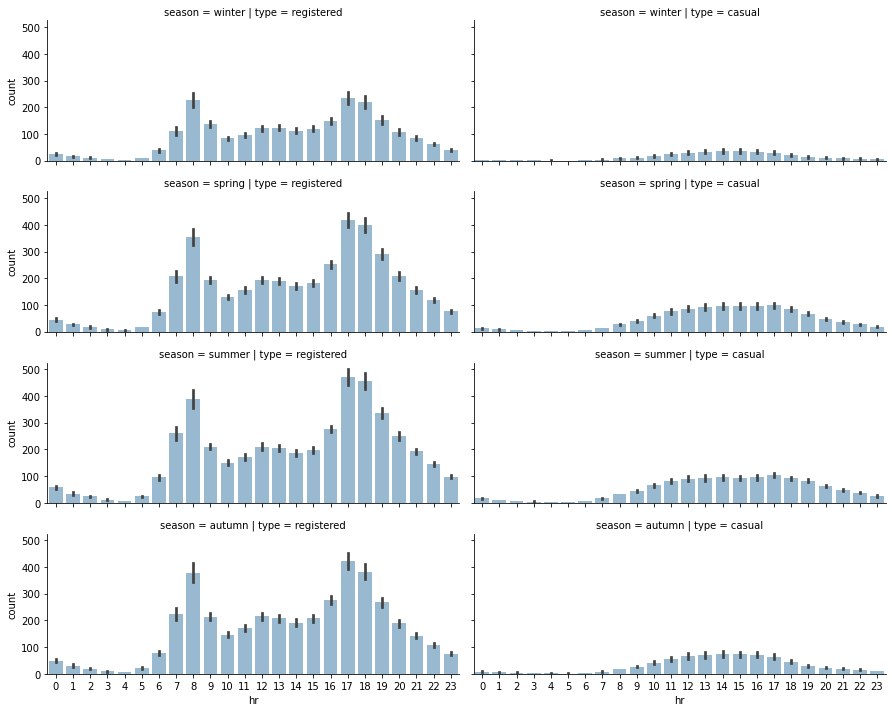

In [187]:
# define FacetGrid
grid = sns.FacetGrid(plot_data, row='season', col='type', height=2.5, aspect=2.5, row_order=['winter', 'spring','summer', 'autumn'])
# apply plotting function to each element in the grid
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)



As can be seen in the plot, while each season has a similar graph shape, the count is lower for the winter graph. So there are fewer rides (registered and casual) during winter. This makes sense, as fewer rides are likely to occur when the weather conditions are poor. 

## Analysing distribution of rides on a weekday basis

In [ ]:
preprocessed_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,0,saturday,0,clear,0.24,0.2879,81.0,0.000,3,13,16
1,2,2011-01-01,winter,2011,1,1,0,saturday,0,clear,0.22,0.2727,80.0,0.000,8,32,40
2,3,2011-01-01,winter,2011,1,2,0,saturday,0,clear,0.22,0.2727,80.0,0.000,5,27,32
3,4,2011-01-01,winter,2011,1,3,0,saturday,0,clear,0.24,0.2879,75.0,0.000,3,10,13
4,5,2011-01-01,winter,2011,1,4,0,saturday,0,clear,0.24,0.2879,75.0,0.000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,winter,2012,12,19,0,monday,1,cloudy,0.26,0.2576,60.0,24.630,11,108,119
17375,17376,2012-12-31,winter,2012,12,20,0,monday,1,cloudy,0.26,0.2576,60.0,24.630,8,81,89
17376,17377,2012-12-31,winter,2012,12,21,0,monday,1,clear,0.26,0.2576,60.0,24.630,7,83,90
17377,17378,2012-12-31,winter,2012,12,22,0,monday,1,clear,0.26,0.2727,56.0,20.145,13,48,61


In [ ]:
plot_data = plot_data.melt(id_vars=['weekday', 'season'], var_name='type', value_name='count')

KeyError: "The following 'id_vars' are not present in the DataFrame: ['weekday']"

KeyError: "['weekday'] not in index"

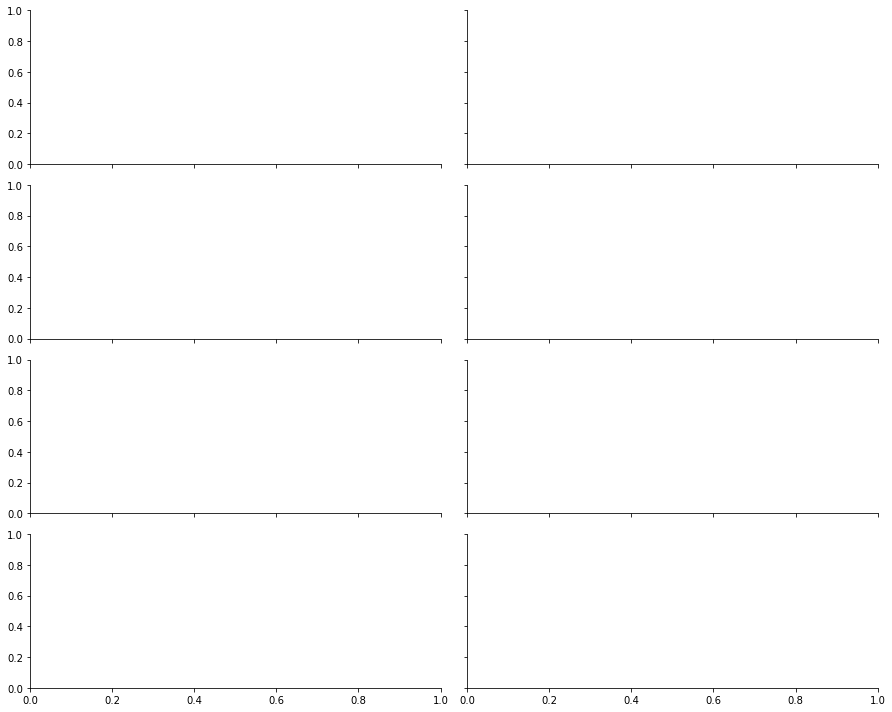

In [ ]:
grid = sns.FacetGrid(plot_data, row='season', col='type', height=2.5, aspect=2.5,
                    row_order=['winter', 'spring', 'summer', 'autumn'])

grid.map(sns.barplot, 'weekday', 'count', alpha=0.5, \
         order=['monday', 'tuesday', 'wednesday', 'thursday', \
                'friday', 'saturday', 'sunday'])

An interesting pattern occurs from the analysis conducted above, Analyzing Seasonal Impact on Rides. There is a decreasing number of registered rides over the weekend (compared to the rest of the week), while the number of casual rides increases. This could enforce our initial hypothesis, that is, that registered customers mostly use the bike sharing service for commuting (which could be the reason for the decreasing number of registered rides over the weekend), while casual customers use the service occasionally over the weekend. Of course, such a conclusion cannot be based solely on plot observations but has to be backed by statistical tests, which is the next part of the notebook

# Hypothesis Testing - Statistics Recap

Hypothesis testing is a branch of inferential statistics, that is, a part of the statistics field in which a general conclusion can be done about a large group (a population) based on the analysis and measurements performed on a smaller group (a sample). A typical example could be making an estimation of the average height of a country's citizens (in this case, the population) based on measurements performed on a thousand people (the sample). Hypothesis testing tries to address the question, "Is a certain hypothetical value in line with the value obtained by direct measurements or not?"


The general idea can be summarised in the following: 

- Definition of null and alternative hypotheses: In this first step, a null hypothesis (denoted as H0) is defined (let's say H0 is 'the average country's population height is 175 cm'). This is the hypothesis that is going to be tested by the statistical test. The alternative hypothesis (denoted as Ha) consists of the complement statement of the null hypothesis (in our example, the alternative hypothesis, Ha, is 'the average height is not 175 cm'). The null and alternative hypotheses always complement one another.




- Identifying the appropriate test statistic: A test statistic is a quantity whose calculation is based on the sample, and whose value is the basis for accepting or rejecting the null hypothesis. In most of these cases, it can be computed by the following formula:

$$
\text {test statistic} = \frac{ \text {sample statistic - value  under null hypothesis}}{ \text {standard error of sample statistic}}
$$

the sample statistic is the statistic value computed on the sample (in our case, the average height of a thousand people); the value under null hypothesis is the value, assuming that the null hypothesis holds (in this case, 175 cm); and the standard error of the sample statistic is the standard error in the measurement of the sample. Once the test statistic is identified and computed, we have to decide what type of probability distribution it follows. In most of the cases, the following probability distributions will be used: Student's t-distribution (for t-tests); Standard normal or z-distribution (for z-tests); Chi-squared distribution (for a chi-squared test) and F-distribution (for F-tests).

Choosing which distribution to use depends on the sample size and the type of test. As a rule of thumb, if the sample size is greater than 30, we can expect that the assumptions of the central limit theorem hold and that the test statistic follows a normal distribution (hence, use a z-test). For a more conservative approach, or for samples with less than 30 entries, a t-test should be used (with a test statistic following Student's t-distribution). 

- #### Specifying the significance level: 
   Once the test statistic has been calculated, we have to decide whether we can reject the null hypothesis or not. In order to do that, we specify a significance level, which is the probability of rejecting a true null hypothesis. A general approach is to specify a level of significance of 5%. This means that we accept that there is a 5% probability that we reject the null hypothesis while being true (for a more conservative approach, we could always use 1% or even 0.5%). Once a significance level is specified, we have to compute the rejection points, which are the values with which the test statistic is compared. If it is larger than the specified rejection point(s), we can reject the null hypothesis and assume that the alternative hypothesis is true. We can distinguish two separate cases here.

- #### Two-sided tests:
  These are tests in which the null hypothesis assumes that the value "is equal to" a predefined value. For example, the average height of the population is equal to 175 cm. In this case, if we specify a significance level of 5%, then we have two critical values (one positive and one negative), with the probability of the two tails summing up to 5%. In order to compute the critical values, we have to find the two percentiles of a normal distribution, such that the probability within those two values is equal to 1 minus the significance level. For example, if we assume that the sample mean of the height follows a normal distribution, with a level of significance for our test of 5%, then we need to find the two percentiles, with the probability that a value drawn from a normal distribution falls outside of those values, equal to 0.05. As the probability is split between the two tails, the percentiles that we are looking at are the 2.5 and 97.5 percentiles, corresponding to the values -1.96 and 1.96 for a normal distribution. Hence, we will not reject the null hypothesis if the following holds true:

$$
\text {test statistic} < - 1.645
$$

Whereas, for tests of the "less than" type, we reject the null hypothesis if the following is the case:

$$
\text {test statistic} >  1.645
$$

Note that, quite often, instead of computing the critical values of a certain significance level, we refer to the p-value of the test. The p-value is the smallest level of significance at which the null hypothesis can be rejected. The p-value also provides the probability of obtaining the observed sample statistic, assuming that the null hypothesis is correct. If the obtained p-value is less than the specified significance level, we can reject the null hypothesis, hence the p-value approach is, in practice, an alternative (and, most of the time, a more convenient) way to perform hypothesis testing.

## Estimating Average Registered Rides

In [176]:
# compute population mean of registered rides
population_mean = preprocessed_data['registered'].mean()
population_mean

153.78686920996606

Estimating the true average number of rides performed by registered users. For example, all the rides during the summer of 2011

In [177]:
# Filtering - Instamnt (index) and registered users in the 'summer' of '2011'
sample = preprocessed_data[(preprocessed_data['season'] == "summer") & (preprocessed_data['yr'] == 2011)]['registered']
sample

4010     23
4011     12
4012      5
4013      2
4014      7
       ... 
6245    388
6246    250
6247    194
6248    166
6249     99
Name: registered, Length: 2240, dtype: int64

Specifying the significance level. A standard value is 0.05 (that is, when performing the statistical test), if the p-value obtained by the statistical test is less than 0.05, you can reject the null hypothesis by at least 95%.

In [ ]:
from scipy.stats import ttest_1samp
test_result = ttest_1samp(sample, population_mean)
print(f"Test statistic: {test_result[0]}, \
p-value: {test_result[1]}")

Test statistic: -3.491969148378619, p-value: 0.0004887645279519517


The result of the previous test returns a p-value smaller than 0.001, which is less than the predefined critical value. Therefore, we can reject the null hypothesis and assume that the alternative hypothesis is correct.

In [178]:
# get sample as 5% of the full data
import random
random.seed(111)
sample_unbiased = preprocessed_data['registered'].sample(frac=0.05)
test_result_unbiased = ttest_1samp(sample_unbiased, \
                                   population_mean)
print(f"Unbiased test statistic: {test_result_unbiased[0]}, \
p-value: {test_result_unbiased[1]}")

Unbiased test statistic: 0.1798783215673017, p-value: 0.8572900779710885


the computed p-value is equal to 0.63, which is much larger than the critical 0.05, and so, you cannot reject the null hypothesis.

In [ ]:
preprocessed_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,0,saturday,0,clear,0.24,0.2879,81.0,0.000,3,13,16
1,2,2011-01-01,winter,2011,1,1,0,saturday,0,clear,0.22,0.2727,80.0,0.000,8,32,40
2,3,2011-01-01,winter,2011,1,2,0,saturday,0,clear,0.22,0.2727,80.0,0.000,5,27,32
3,4,2011-01-01,winter,2011,1,3,0,saturday,0,clear,0.24,0.2879,75.0,0.000,3,10,13
4,5,2011-01-01,winter,2011,1,4,0,saturday,0,clear,0.24,0.2879,75.0,0.000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,winter,2012,12,19,0,monday,1,cloudy,0.26,0.2576,60.0,24.630,11,108,119
17375,17376,2012-12-31,winter,2012,12,20,0,monday,1,cloudy,0.26,0.2576,60.0,24.630,8,81,89
17376,17377,2012-12-31,winter,2012,12,21,0,monday,1,clear,0.26,0.2576,60.0,24.630,7,83,90
17377,17378,2012-12-31,winter,2012,12,22,0,monday,1,clear,0.26,0.2727,56.0,20.145,13,48,61


In the above analysis we performed hypothesis testing with Python on the bike sharing dataset. Furthermore, we saw the importance of having an unbiased sample of the data, as test results can be easily compromised if working with biased data.

Quite often, when performing statistical tests, we want to compare certain statistics on two different groups (for example, the average height between women and men) and estimate whether there is a statistically significant difference between the values obtained in the two groups. Let's denote, with μ1 and μ2, the hypothetical means of the two groups, where we will have: 

- A null hypothesis: H0:μ1-μ2 ≠ 0
- An alternative hypothesis: Ha:μ1-μ2 ≠ 0

look at sample mean and test statistics for recap

In [179]:
plot_data = preprocessed_data[['weekday', 'season', 'registered', 'casual']]

# Hypothesis testing on Registered Rides
Formulating the null hypothesis, we are interested in identifying whether there is a statistically significant difference between registered rides during working days and the weekend. Therefore, our null hypothesis is that the average number of rides for registered users during working days is the same as the average number of rides during the weekend. In other words:

H_0 : average registered rides over weekdays-average registered rides over weekend=0

and

H_a : average registered rides over weekdays-average registered rides over weekend≠0

In [180]:
weekend_days = ['saturday', 'sunday']
# Filtering only weekend
weekend_mask = preprocessed_data['weekday'].isin(weekend_days)
# Filtering only weekday
workingdays_mask = ~preprocessed_data['weekday'].isin(weekend_days)
# select registered rides for the weekend and working days
# weekend_data = preprocessed_data.registered[weekend_mask]
weekend_data = (preprocessed_data['registered'])[weekend_mask]
workingdays_data = preprocessed_data.registered[workingdays_mask]



# # define mask, indicating if the day is weekend or work day
# weekend_days = ['saturday', 'sunday']
# weekend_mask = preprocessed_data.weekday.isin(weekend_days)
# workingdays_mask = ~preprocessed_data.weekday.isin(weekend_days)
# # select registered rides for the weekend and working days
# weekend_data = preprocessed_data.registered[weekend_mask]
# workingdays_data = preprocessed_data.registered[workingdays_mask]



Performing the two-sample t-tests by using the scipy.stats.ttest_ind function:

In [181]:
# perform t-test
from scipy.stats import ttest_ind
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, \
p-value: {test_res[1]:.05f}")

Statistic value: -16.004, p-value: 0.00000


The resulting p-value from this test is less than 0.0001, which is far below the standard critical 0.05 value. As a conclusion, we can reject the null hypothesis and confirm that our initial observation is correct: that is, there is a statistically significant difference between the number of rides performed during working days and the weekend.

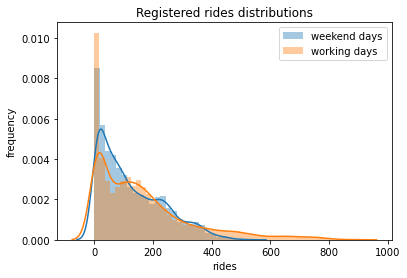

In [182]:
"""
plot distributions of registered rides for working vs weekend days
"""
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Registered rides distributions")
plt.savefig('figs/exercise_1_04_a.png', format='png')

Performing the same type of hypothesis testing to validate the second assumption from the last section— that is, casual users perform more rides during the weekend. In this case, the null hypothesis is that the average number of rides during working days is the same as the average number of rides during the weekend, both performed only by casual customers. The alternative hypothesis will then result in a statistically significant difference in the average number of rides between the two groups:



The p-value returned from the code is 0, which is strong evidence against the null hypothesis. Hence, we can conclude that casual customers also behave differently over the weekend (in this case, they tend to use the bike sharing service more) as seen in the following figure:

Statistic value: 41.077, p-value: 0.000


G:\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Casual rides distributions')

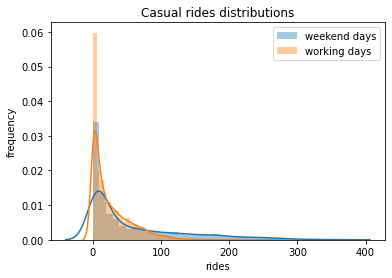

In [ ]:
# select casual rides for the weekend and working days
weekend_data = (preprocessed_data['casual'])[weekend_mask]
workingdays_data = preprocessed_data.casual[workingdays_mask]
# perform ttest
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, \
p-value: {test_res[1]:.03f}")
# plot distributions of casual rides for working vs weekend days
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Casual rides distributions")
#plt.savefig('figs/exercise_1_04_b.png', format='png')

In conclusion, we can say that there is a statistically significant difference between the number of rides on working days and weekend days for both casual and registered customers. 

# Analysis of Weather- Related features

analysis of the group of features representing the weather conditions. Our expectation is to observe a strong dependency of those features on the current number of rides, as bad weather can significantly influence bike sharing services.

The weather features we identified earlier are the following:

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist


3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + 
Scatterd clouds


4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 






- temp: This is the normalized temperature in Celsius. Values are divided by 41, which means that the highest registered temperature in the data is 41°C (corresponding to 1 in our dataset).



- atemp: The normalized feeling temperature in Celsius. Values are divided by 50, which means that the highest registered temperature in the data is 50°C (corresponding to 1 in our dataset).



- hum: The humidity level as a percentage.



- windspeed: The wind speed in m/s.


From the provided descriptions, we can see that most of the weather-related features assume continuous values (except for weathersit). Furthermore, as both our variables of interest (the casual and registered number of rides) are also continuously distributed, the first and most common way to measure the relationship between two different continuous variables is to measure their correlation.

Correlation (also known as Pearson's correlation) is a statistic that measures the degree to which two random variables move in relation to each other. In practice, it provides a numerical measure (scaled between -1 and 1), through which we can identify how much one of the variables would move in one direction, assuming that the other one moves.

LOOK AT CORRELATION COEFFICIENT BETWEEN X AND Y FORMULA 





As we want to compare several variables, it makes sense to define a function that performs the analysis between the variables, as we want to follow the Don't Repeat Yourself principle (commonly known as DRY):

In [188]:
def plot_correlations(data, col):
# get correlation between col and registered rides - np.corrcoeff is a numpy function
    corr_r = np.corrcoef(data[col], data["registered"])[0,1]
    ax = sns.regplot(x=col, y="registered", data=data, \
                     scatter_kws={"alpha":0.05}, \
                     label=f"Registered rides \
                     (correlation: {corr_r:.3f})")
# get correlation between col and casual rides
    corr_c = np.corrcoef(data[col], data["casual"])[0,1]
    ax = sns.regplot(x=col, y='casual', data=data, \
                     scatter_kws={"alpha":0.05}, \
                     label=f"Casual rides (correlation: {corr_c:.3f})")
    #adjust legend alpha
    legend = ax.legend()
    for lh in legend.legendHandles:
        lh.set_alpha(0.5)
    ax.set_ylabel("rides")
    ax.set_title(f"Correlation between rides and {col}")
    return ax

In [211]:
#testing corr_r code
test = np.corrcoef(preprocessed_data['atemp'], preprocessed_data["registered"])
#test[0,1]
test[1,0]

0.3325586354050967

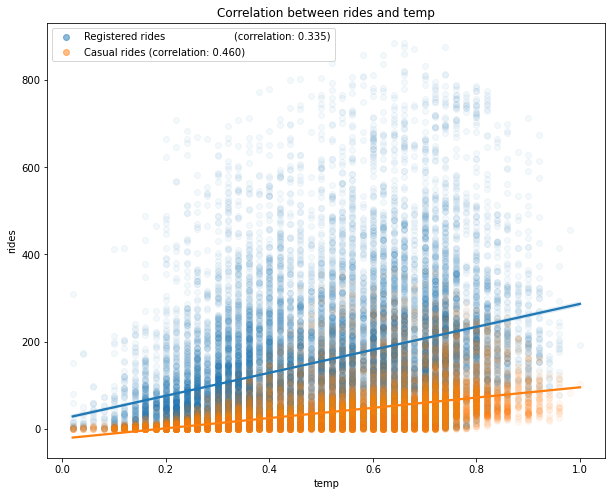

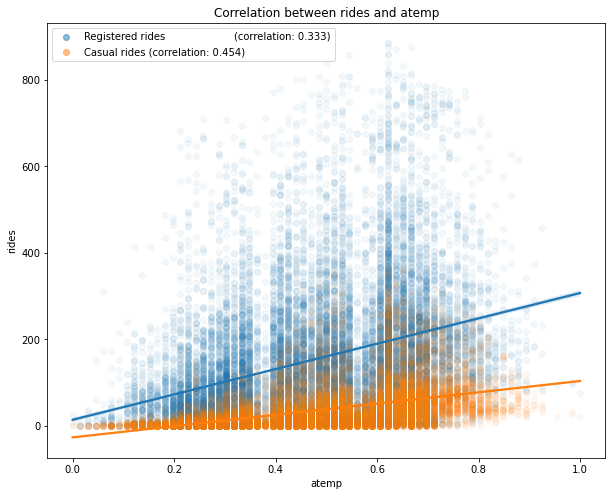

In [189]:
#Applying the previously defined function to the four columns (temp, atemp, hum, and windspeed) returns the following figure:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'temp')
plt.savefig('figs/correlation_temp.png', format='png')
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'atemp')
plt.savefig('figs/correlation_atemp.png', format='png')

Now plotting the correlation between the rides and hum, windspeed features separately:

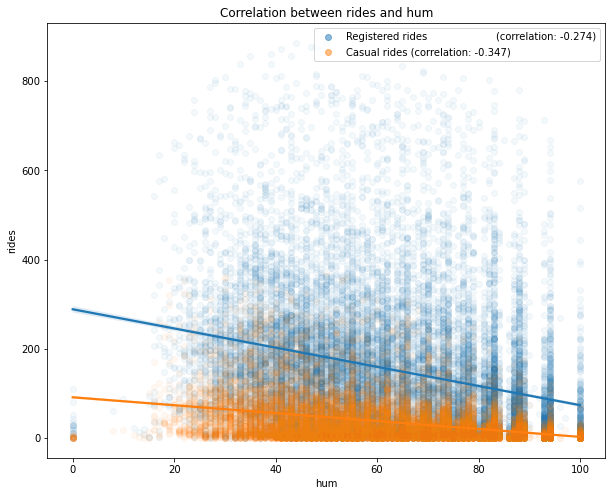

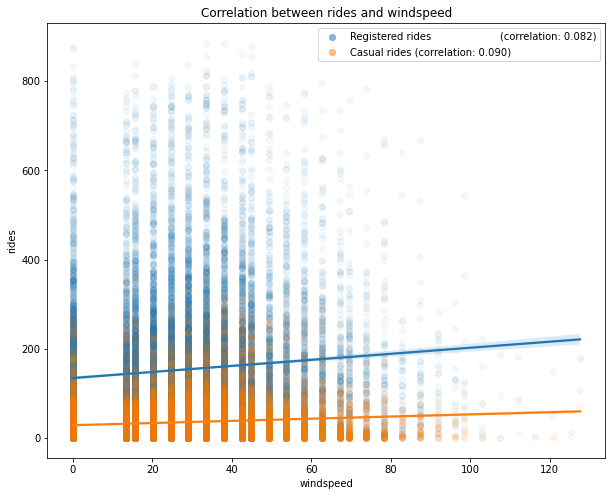

In [212]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'hum')
plt.savefig('figs/correlation_hum.png', format='png')
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'windspeed')
plt.savefig('figs/correlation_windspeed.png', format='png')

we can observe that higher temperatures have a positive impact on the number of rides (the correlation between registered/casual rides and temp is 0.335 and 0.46, respectively, and it's a similar case for atemp). Note that as the values in the registered column are widely spread with respect to the different values in temp, we have a lower correlation compared to the casual column. The same pattern can be observed in Figure 1.21, in which the humidity level has a negative correlation with both types of rides (-0.274 for registered and -0.347 for casual). This means that with a high level of humidity (mist or rain), customers will tend not to use the bike sharing service. From Figure 1.22, we can see that there is minimal correlation between the number of rides and the wind speed (a weak positive correlation).

One of the major drawbacks of the correlation coefficient is its assumption of a linear relationship between the two random variables. This is quite a strong assumption as, most of the time, relationships in nature are not linear. A measure that generalizes the Pearson's correlation to monotonic relationships between two variables is the Spearman rank correlation. 